In [2]:
import pandas as pd
import numpy as np

In [62]:
data2=pd.read_csv("코로나19 경기도현황1.csv")
data2.head()

,"기준일(발병일, 확진일 선택)",지역 + 시,"필터(무증상,조사중 제외)",무증상/조사중,무증상/조사중 기준일,지역,지역 (group),확진일자,레코드 수
0,2020. 1. 26.,고양시,참,,2020. 1. 26.,고양일산서,고양,2020. 1. 26.,1
1,2020. 1. 27.,평택시,참,,2020. 1. 27.,평택,평택,2020. 1. 27.,1
2,2020. 2. 1.,부천시,참,,2020. 2. 1.,부천,부천,2020. 2. 1.,1
3,2020. 2. 2.,부천시,참,,2020. 2. 2.,부천,부천,2020. 2. 2.,1
4,2020. 2. 2.,수원시,참,,2020. 2. 2.,수원장안,수원,2020. 2. 2.,1


# 큰 사건을 제외했을 때, 전체적인 확산 추이보기
- 감염경로를 기준으로 큰 사건을 분류하고,
- 날짜별 전체 확진자에서 큰 사건에 의해 발생한 확진자수를 빼기

In [475]:
total_cnt=pd.read_csv("일별확진자수.csv",  index_col=0)
total_cnt.head()

,날짜,확진자수
0,2020-08-28,371
1,2020-08-27,441
2,2020-08-26,320
3,2020-08-25,280
4,2020-08-24,266


In [476]:
total_cnt=total_cnt.sort_values(by=["날짜"], ascending=True)
total_cnt=total_cnt.set_index('날짜')
total_cnt.head()

,확진자수
날짜,
2020-01-23,1
2020-01-24,1
2020-01-26,1
2020-01-27,1
2020-01-28,0


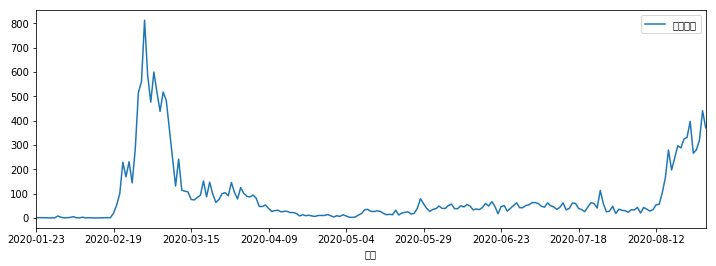

In [477]:
total_cnt.plot(figsize=(12,4))

In [227]:
full_data = pd.read_excel('코로나19 경기도 확진환자.xlsx', index_col=0)
full_data.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분2,구분
연번,,,,,,,,,,,,,,
1.0,3,M,54,50,2020. 1. 26.,2020. 1. 22.,,고양-1,고양일산서,,해외유입,grp01,,Primary
2.0,4,M,55,50,2020. 1. 27.,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,,Primary
3.0,12,M,48,40,2020. 2. 1.,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,,Primary
4.0,14,F,40,40,2020. 2. 2.,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,,접촉자
5.0,15,M,42,40,2020. 2. 2.,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,,Primary


In [228]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3414 entries, 1.0 to 3414.0
Data columns (total 14 columns):
확진자        3414 non-null object
성별         3414 non-null object
나이(만)      3414 non-null int64
연령대        3414 non-null object
확진일자       3414 non-null object
증상발현일      2210 non-null object
무증상/조사중    3414 non-null object
경기번호       3414 non-null object
지역         3414 non-null object
재검출        3414 non-null object
감염경로       3414 non-null object
GRP        3414 non-null object
구분2        3414 non-null object
구분         2803 non-null object
dtypes: int64(1), object(13)
memory usage: 400.1+ KB


In [383]:
full_data["확진일자"] = pd.to_datetime(full_data["확진일자"], format = '%Y. %m. %d.')
full_data.head()

,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분2,구분
연번,,,,,,,,,,,,,,
1.0,3,M,54,50,2020-01-26,2020. 1. 22.,,고양-1,고양일산서,,해외유입,grp01,,Primary
2.0,4,M,55,50,2020-01-27,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,,Primary
3.0,12,M,48,40,2020-02-01,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,,Primary
4.0,14,F,40,40,2020-02-02,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,,접촉자
5.0,15,M,42,40,2020-02-02,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,,Primary


In [385]:
tmp_data=full_data[['확진일자','감염경로']]
tmp_data['감염경로'].unique()

array(['해외유입', '대구경북_일반', '대구_신천지', '과천_신천지', '불명확', '서울_콜센터', '천안세종_줌바'],
      dtype=object)

In [386]:
## ['감염경로'] == "해외유입"

overseas_inflow=tmp_data[tmp_data['감염경로']=='해외유입']
overseas_inflow.head(3)

,확진일자,감염경로
연번,,
1.0,2020-01-26,해외유입
2.0,2020-01-27,해외유입
3.0,2020-02-01,해외유입


In [387]:
overseas_inflow=overseas_inflow.groupby('확진일자')
overseas_inflow=overseas_inflow.count()
overseas_inflow.head(3)

,감염경로
확진일자,
2020-01-26,1
2020-01-27,1
2020-02-01,1


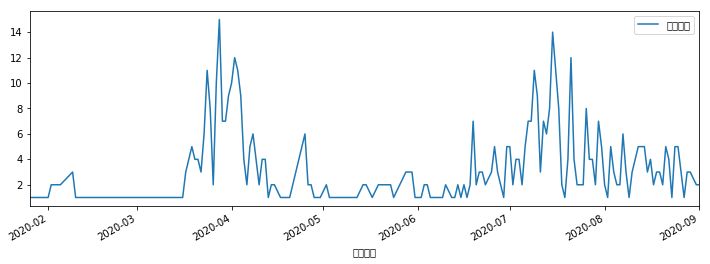

In [388]:
overseas_inflow.plot(figsize=(12,4))

In [389]:
## ['감염경로'] == "신천지"

shincheonji=tmp_data[ (tmp_data['감염경로']=='대구_신천지') | (tmp_data['감염경로']=='과천_신천지') | (tmp_data['감염경로']=='대구경북_일반')]
shincheonji.shape

(81, 2)

In [390]:
shincheonji=shincheonji.groupby('확진일자')
shincheonji=shincheonji.count()
shincheonji.head(3)

,감염경로
확진일자,
2020-02-20,1
2020-02-21,2
2020-02-22,7


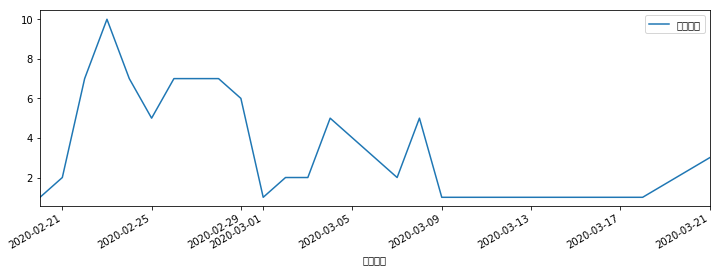

In [391]:
shincheonji.plot(figsize=(12,4))

(54, 2)


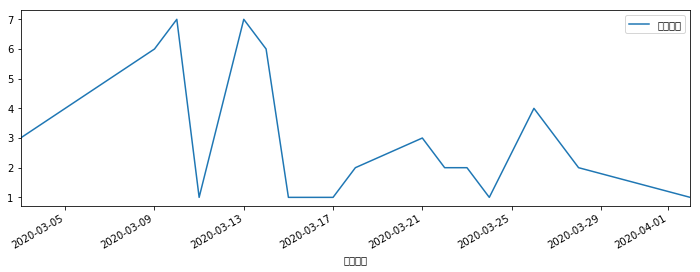

In [392]:
## ['감염경로'] == "서울_콜센터"

call_center=tmp_data[tmp_data['감염경로']=='서울_콜센터']
print(call_center.shape)

call_center=call_center.groupby('확진일자')
call_center=call_center.count()
call_center.plot(figsize=(12,4))

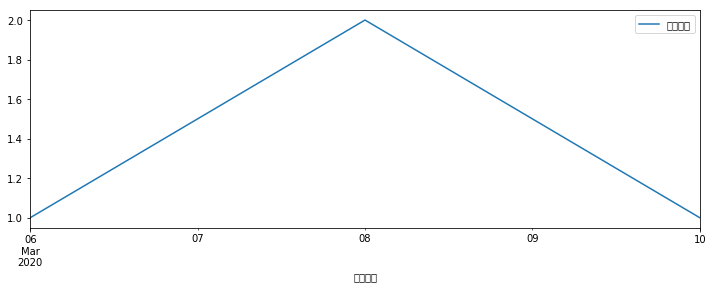

In [393]:
### 감염경로 = 천안세종_줌바

zumba=tmp_data[tmp_data['감염경로']=='천안세종_줌바']
zumba=zumba.groupby('확진일자')
zumba=zumba.count()
zumba.plot(figsize=(12,4))

#### 전체 데이터에서 큰 사건 제외하기

In [484]:
mergeDF=pd.concat([overseas_inflow,shincheonji,call_center, zumba], axis=1)
mergeDF.columns=['overseas_inflow','shincheonji','call_center','zumba']
mergeDF.head(10)

,overseas_inflow,shincheonji,call_center,zumba
확진일자,,,,
2020-01-26,1.0,NaN,NaN,NaN
2020-01-27,1.0,NaN,NaN,NaN
2020-02-01,1.0,NaN,NaN,NaN
2020-02-02,2.0,NaN,NaN,NaN
2020-02-05,2.0,NaN,NaN,NaN
2020-02-09,3.0,NaN,NaN,NaN
2020-02-10,1.0,NaN,NaN,NaN
2020-02-18,1.0,NaN,NaN,NaN
2020-02-20,NaN,1.0,NaN,NaN


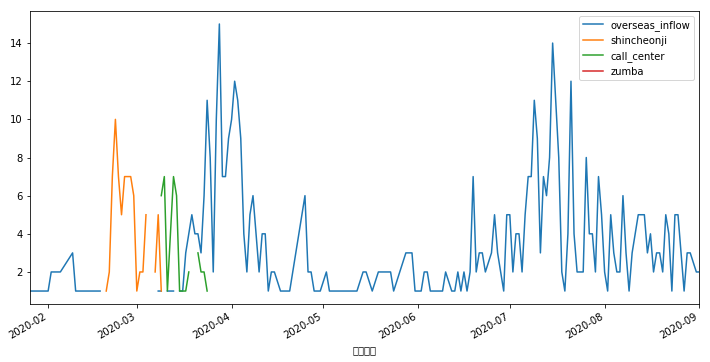

In [440]:
mergeDF.plot(figsize=(12,6))

In [466]:
mergeDF=mergeDF.sum(axis=1)

mergeDF=pd.DataFrame(mergeDF, columns=['확진자수'])
mergeDF.head(3)

,확진자수
확진일자,
2020-01-26,1.0
2020-01-27,1.0
2020-02-01,1.0


In [478]:
total_cnt.head(3)

,확진자수
날짜,
2020-01-23,1
2020-01-24,1
2020-01-26,1


In [479]:
merge=pd.merge(total_cnt,mergeDF, left_index=True, right_index=True, how='outer' )
merge=merge.fillna(0)
merge.head()

,확진자수_x,확진자수_y
2020-01-23,1.0,0.0
2020-01-24,1.0,0.0
2020-01-26,1.0,1.0
2020-01-27,1.0,1.0
2020-01-28,0.0,0.0


In [480]:
# 전체 확진자에서 큰 사건들로 인한 확진자 제외시키기

sub_data=merge["확진자수_x"]-merge["확진자수_y"]
sub_data.head(20)

2020-01-23    1.0
2020-01-24    1.0
2020-01-26    0.0
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
2020-02-01    7.0
2020-02-02    1.0
2020-02-03    0.0
2020-02-04    1.0
2020-02-05    0.0
2020-02-06    5.0
2020-02-07    1.0
2020-02-08    0.0
2020-02-09    0.0
2020-02-10   -1.0
2020-02-11    1.0
2020-02-12    0.0
2020-02-13    0.0
dtype: float64

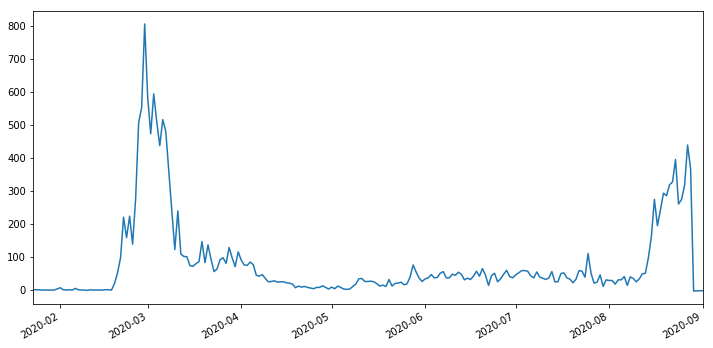

In [487]:
sub_data.plot(figsize=(12,6))

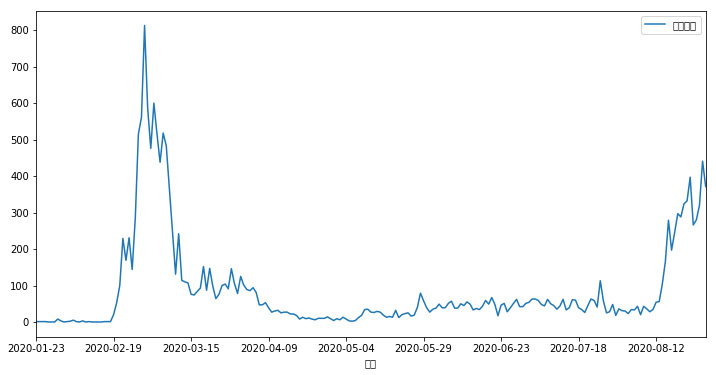

In [489]:
# 기존의 전체 데이터와 큰 사건을 제외한 데이터 비교

total_cnt.plot(figsize=(12,6))

In [ ]:
# 큰 사건이 일어나기 이전에는 낮은 증가율을 보임. 
# 하지만 전체 확진자수와 큰 사건에 의한 확진자수를 제거한 데이터를 비교해보았을 때, 큰 차이는 없어보임
## == 감염경로가 "불명확" 한 경우가 크게 영향을 미친다.

## --> 감염경로가 "불명확"하다고 표기되어있지만 큰 사건과 큰 연관성을 가지고 있을 것이다.